In [26]:
import torch
from torch import nn as nn
import torch.nn.functional as F
from util.unet import UNet
from torchvision import transforms

In [27]:
def setupModel(in_channels, n_classes, depth, wf, padding=True, batch_norm=True, up_mode='upconv'):
    model = nn.Sequential(
        nn.BatchNorm2d(num_features = in_channels),
        UNet(in_channels, n_classes, depth, wf, padding, batch_norm, up_mode)#,
        #nn.Sigmoid()
    )
    return model
model = setupModel(in_channels=3, n_classes=1, depth=3, wf=4)

In [28]:
prep = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
from PIL import Image
img = Image.open("../Chapter 2/husky-dog.jpg")
img_t = prep(img)
batch_t = torch.unsqueeze(img_t, 0)

out = model(batch_t)

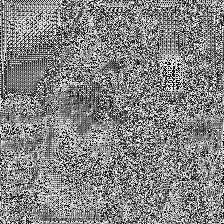

In [29]:
out_t = out.data.squeeze()

# turn into an image
out_img = transforms.ToPILImage()(out_t)
out_img

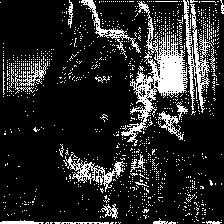

In [30]:
out_mask = out_t >= 0.5
out_mask = transforms.ToPILImage()(out_mask.to(dtype=float))
out_mask